In [123]:
#importing necessary libraries.
import numpy as np
import sklearn
from sklearn import *
import pandas as pd
import matplotlib.pyplot as plt
#function to sample only positive values from a guassian.
def posOnly(fi):
    correct=False
    val=0
    while(correct==False):
        a= np.random.normal(fi,1)
        if a>0:
            val=a
            correct=True
    return val        
#function to sample only negative values from a guassian.
def negOnly(fi):
    correct=False
    val=0
    while(correct==False):
        a= np.random.normal(fi,1)
        if a<0:
            val=a
            correct=True
    return val

In [124]:
#reading in the train and test data.
train= pd.read_csv("train.csv")
test= pd.read_csv("testX.csv")

In [125]:
#defining the target based on the data.
target= train["y"]
train= train.drop(columns=["y"])

In [126]:
#computing the gamma parameter to be passed into the kernel function comprising of the length scale.
gammaC=0.5/np.sum(train.mean(axis=0)**2)
gammaC_st= 0.5/np.sum(train.mean(axis=0)**2)
gammaR= 0.5/np.sum(pd.concat([train,test]).mean(axis=0)**2)

In [127]:
#computing the covariance matrix using rbf kernel for train, test data and train & test data points combined.
C_star=sklearn.metrics.pairwise.rbf_kernel(test, Y=None, gamma=gammaC) + np.eye(3,3)*0.00001
C=sklearn.metrics.pairwise.rbf_kernel(train, Y=None, gamma=gammaC_st) + np.eye(100,100)*0.00001
R=sklearn.metrics.pairwise.rbf_kernel(train, Y=test,gamma=gammaR) + np.eye(100,3)*0.00001

In [128]:
#initialising the auxialiary varaible ie z vector.
import random
z=[]
for i in target:
    if i==1:
        z.append(random.uniform(0.0001, 10))
    else:
        z.append(random.uniform(-10, -0.0001))
zvec= np.array(z)
zvec=zvec.reshape((100,1))

In [131]:
#compute updated covariance for P(F|z,Y)
f_c=np.linalg.inv(np.linalg.inv(C) + np.eye(100,100))
#computing the covariance for f_star.
f_st_c= C_star - np.dot(np.dot(R.T,np.linalg.inv(C)),R)
#list to store predictions for test data.
predictions=[]
#list to store z values for test data.
z_stars=[]
for i in range(0,10000):
    f_m= np.dot(f_c,zvec) #computing the mean for P(F|z,Y)
    f_samples=np.random.multivariate_normal(f_m.flatten(), f_c, 1).T #generate the samples for P(F|z,Y)
    for i in range(100):
        if target[i] == 0:
            val=negOnly(f_samples[i]) #sample from the conditional P(z_i|f_i,Y=0).
            zvec[i]=val
        else:
            val=posOnly(f_samples[i])#sample from the conditional P(z_i|f_i,Y=1).
            zvec[i]=val
    #computing the mean for f_star
    f_st_m= np.dot(np.dot(R.T,np.linalg.inv(C)),f_samples)
    #generating samples from f_star.
    f_star_samples = np.random.multivariate_normal(f_st_m.flatten(), f_st_c, 1).T
    #generating z values from f_star.
    z_star=np.random.multivariate_normal(f_star_samples.flatten(),np.eye(3,3), 1).T
    #making predictions based on z star values.
    pred= [0 if i<0 else 1 for i in z_star]
    #adding the predictions and z star values for each iteration to the list.
    predictions.append(pred)
    z_stars.append(z_star)

In [130]:
#printing predictive probabilities.
print("Predictive Probabilities for rows 1,2 and 17: ")
pd.DataFrame(predictions).mean()

Predictive Probabilities for rows 1,2 and 17: 


0    0.5010
1    0.4907
2    0.4983
dtype: float64

In [132]:
#code for generating histogram.
preds= pd.DataFrame(predictions)
zl=[list(i) for i in z_stars]
zstars= pd.DataFrame(zl)
z1=[]
for i in zstars[0]:
    for j in i:
        z1.append(float(j))
z2=[]
for i in zstars[1]:
    for j in i:
        z2.append(float(j))
z17=[]
for i in zstars[2]:
    for j in i:
        z17.append(float(j))  

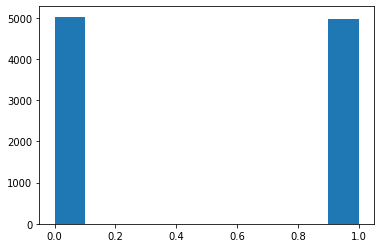

In [133]:
#predictions for row 1 histogram
plt.hist(preds[0])
plt.show()

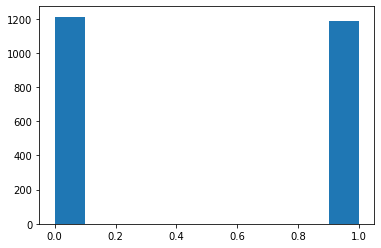

In [99]:
#predictions for row 2 histogram
plt.hist(preds[1])
plt.show()

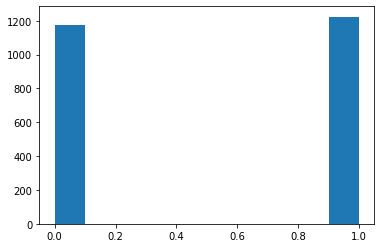

In [100]:
#predictions for row 17 histogram
plt.hist(preds[2])
plt.show()

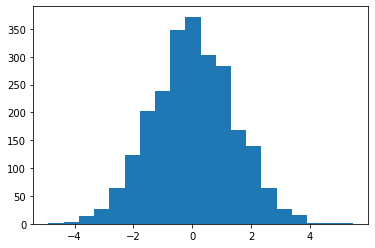

In [101]:
#z values for row 1 histogram
plt.hist(z1,bins=20)
plt.show()

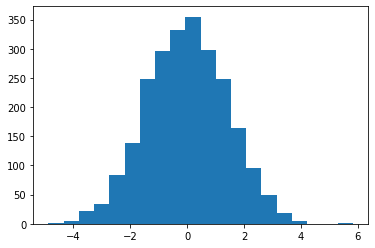

In [102]:
#z values for row 2 histogram
plt.hist(z2,bins=20)
plt.show()

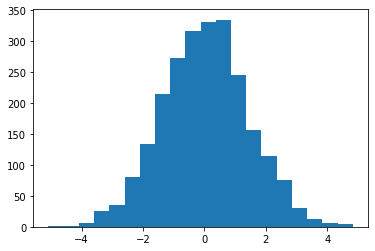

In [103]:
#z values for row 17 histogram
plt.hist(z17,bins=20)
plt.show()